## Análise de Convergência dos estados brasileiros considerando indicadores utilizados pelo Eurofound

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Indicador relacionado a Estimativas Anuais de Emissões de Gases de Efeito Estufa

In [9]:
arquivo2 = "sirene_gee.xlsx"

caminho_completo2 = os.path.abspath(arquivo2)
print("O caminho completo para o arquivo é:", caminho_completo2)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\sirene_gee.xlsx


In [10]:
df_sirene_gee = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\sirene_gee.xlsx')

In [11]:
df_sirene_gee.head()

,CO₂e (GWP SAR)\n(Gg),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Rondônia,115564.095796,85520.721635,110961.098075,121666.692263,120593.662500,292540.834543,133543.627309,104044.116848,104371.445959,...,107511.636708,68412.360124,12255.858775,8170.725169,39325.606333,33516.040370,44388.299464,26821.871491,52857.366410,78812.645280
1,Acre,35149.152230,23851.485395,31297.859883,34511.967875,33980.702209,86888.761685,24122.158131,18605.390340,31824.786826,...,8588.698625,17610.355608,5595.373404,16375.660522,9574.538609,12066.651414,4659.277905,12305.099765,8758.332063,18319.260922
2,Amazonas,35754.777398,18333.821824,19966.505356,4866.225960,265.008063,74086.798294,-2547.209088,-31277.630304,-28082.501960,...,-55289.049384,-56509.409736,-91509.181544,-75381.629655,-104310.210503,-103213.845438,-98929.628607,-105226.767656,-89060.341886,-56224.519261
3,Roraima,5085.069935,3118.771300,-6235.135630,-5487.526462,-5569.828598,5776.767453,4853.427007,1998.072654,5501.887529,...,-1834.990896,14929.833009,-13899.506361,-5971.891159,-10773.143786,-12054.317792,-8279.018972,-4049.081348,-9210.205747,-5155.762693
4,Pará,224556.936511,166672.536383,207031.030640,226250.093045,218596.740122,573722.923480,421608.888267,259343.810912,390150.300201,...,349498.652965,358687.478036,222106.721283,173680.003505,128961.617520,19213.318279,71462.566668,31793.788004,56755.266176,130443.585372


In [12]:
df_sirene_gee.columns

Index(['CO₂e (GWP SAR)\n(Gg)',                   1990,                   1991,
                         1992,                   1993,                   1994,
                         1995,                   1996,                   1997,
                         1998,                   1999,                   2000,
                         2001,                   2002,                   2003,
                         2004,                   2005,                   2006,
                         2007,                   2008,                   2009,
                         2010,                   2011,                   2012,
                         2013,                   2014,                   2015,
                         2016],
      dtype='object')

In [13]:
df_sirene_gee = df_sirene_gee.melt(id_vars=['CO₂e (GWP SAR)\n(Gg)'], var_name='Ano', value_name='Emissões_CO2e')
df_sirene_gee.tail()

,CO₂e (GWP SAR)\n(Gg),Ano,Emissões_CO2e
751,Mato Grosso do Sul,2016,3298.991534
752,Mato Grosso,2016,131625.508397
753,Goiás,2016,11960.665520
754,Distrito Federal,2016,-226.442493
755,Brasil,2016,397357.040351


In [14]:
df_sirene_gee = df_sirene_gee.rename(columns={'CO₂e (GWP SAR)\n(Gg)': 'Estado'})

In [15]:
df_sirene_gee.columns

Index(['Estado', 'Ano', 'Emissões_CO2e'], dtype='object')

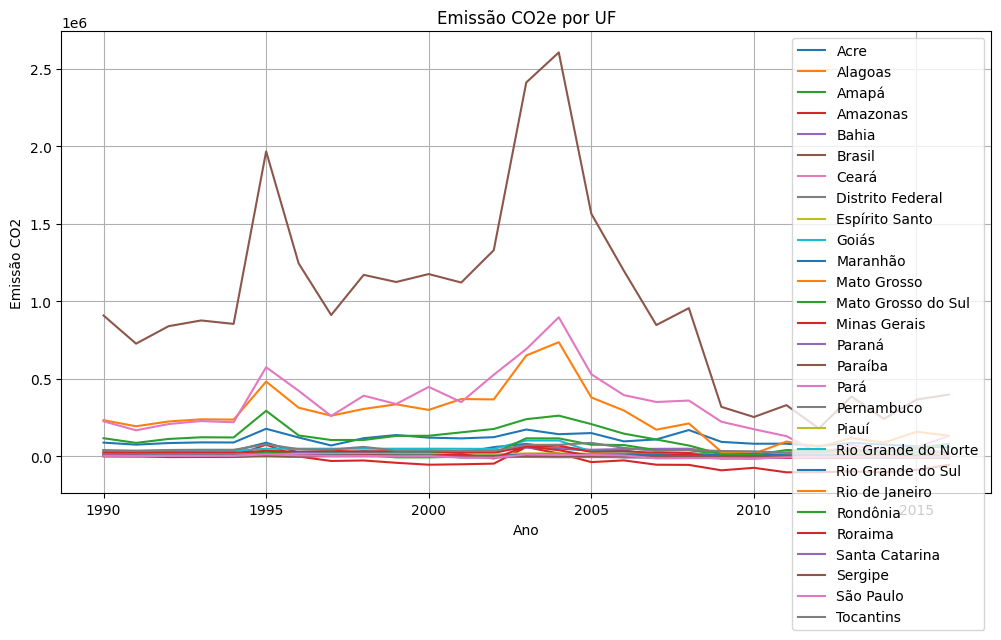

In [16]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_sirene_gee.groupby('Estado'):
    plt.plot(dados_território['Ano'], dados_território['Emissões_CO2e'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Emissão CO2e por UF')
plt.xlabel('Ano')
plt.ylabel('Emissão CO2')
plt.legend()
plt.grid(True)

plt.show()

In [17]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_sirene_gee_est = df_sirene_gee[~df_sirene_gee['Estado'].str.contains('Brasil')]

In [18]:
df_sirene_gee_est.head()

,Estado,Ano,Emissões_CO2e
0,Rondônia,1990,115564.095796
1,Acre,1990,35149.152230
2,Amazonas,1990,35754.777398
3,Roraima,1990,5085.069935
4,Pará,1990,224556.936511


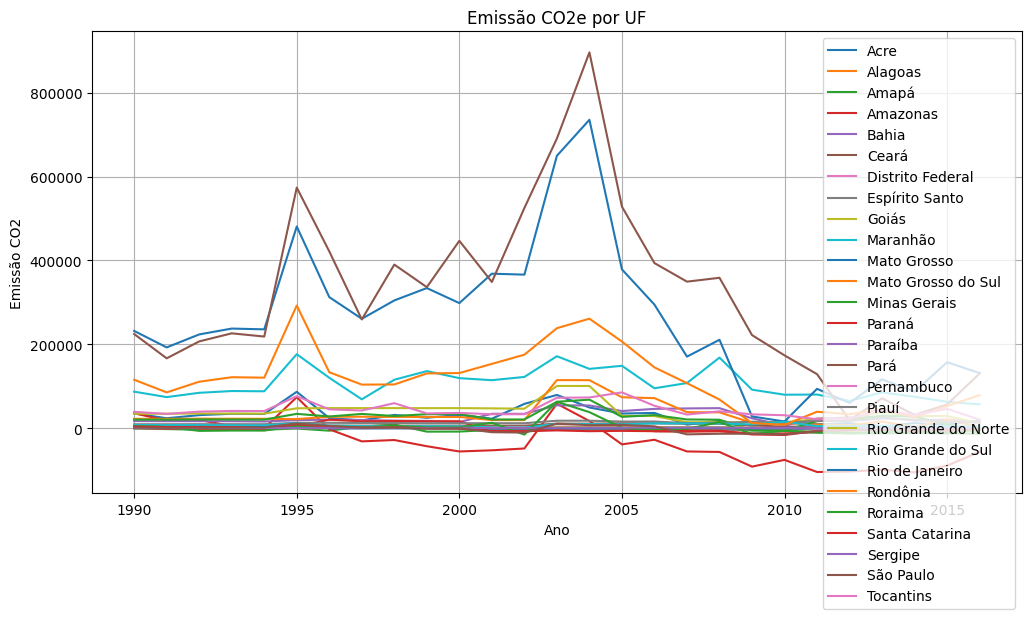

In [19]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_sirene_gee_est.groupby('Estado'):
    plt.plot(dados_território['Ano'], dados_território['Emissões_CO2e'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Emissão CO2e por UF')
plt.xlabel('Ano')
plt.ylabel('Emissão CO2')
plt.legend()
plt.grid(True)

plt.show()

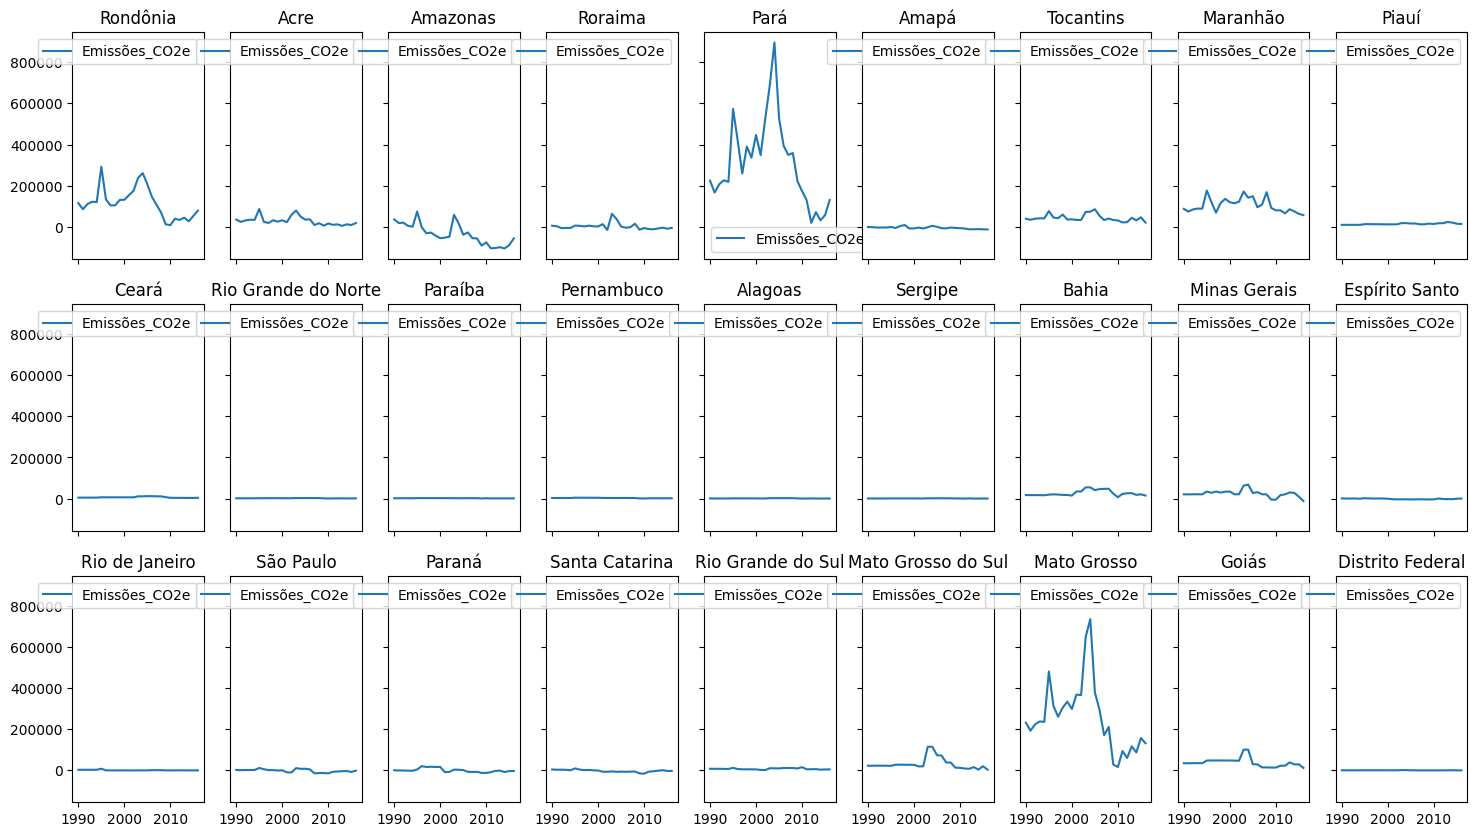

In [20]:
# Obter lista de unidades territoriais únicas
unidades_territoriais =  df_sirene_gee_est['Estado'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data =  df_sirene_gee_est[df_sirene_gee_est['Estado'] == territorial]
   
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='Emissões_CO2e', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [21]:
#criando arquivo csv final
df_sirene_gee_est.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\df_sirene_gee_est.csv', encoding='UTF-8')